In [3]:
from Bio import SeqIO
import pandas as pd
from pathlib import Path

In [4]:
df = pd.read_csv("../data/dms_signal/combined.tsv", sep="\t")
df["chr"].unique()

array(['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrMito', 'chrV',
       'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII',
       'chrXIV', 'chrXV', 'chrXVI'], dtype=object)

In [5]:
GENE_NAME = "ASH1"
CHR = "chrXI"
TRANSCRIPT_ID = "NM_001179751.1"
TRANSCRIPT_START = 94499
THRESHOLD = 0.2

In [6]:
GENE_NAME = "SEN34"
CHR = "chrI"
TRANSCRIPT_ID = "NM_001178212.1"
TRANSCRIPT_START = 158966
THRESHOLD = 0.2

In [7]:
sel_chr = df[df["chr"] == CHR]
sel_chr

,chr,pos,signal
0,chrI,794,1.0
1,chrI,2953,1.0
2,chrI,3637,1.0
3,chrI,3639,1.0
4,chrI,3793,1.0
...,...,...,...
35223,chrI,226990,1.0
35224,chrI,227313,1.0
35225,chrI,227553,1.0
35226,chrI,228823,1.0


In [8]:
transcripts = SeqIO.parse("../data/R64/rna.fna", "fasta")
for rec in transcripts:
    if rec.id == TRANSCRIPT_ID:
        Path(f"../output/{GENE_NAME}").mkdir(parents=True, exist_ok=True)
        with open(f"../output/{GENE_NAME}/seq.fasta", "w") as f:
            f.write(f">{rec.id}\n{rec.seq}\n")
        break

In [9]:
sel_chr.loc[:, "pos"] = sel_chr["pos"] - TRANSCRIPT_START
sel_chr = sel_chr[sel_chr["pos"] >= 0]
sel_chr

,chr,pos,signal
30349,chrI,6,3.0
30350,chrI,12,1.0
30351,chrI,15,1.0
30352,chrI,22,1.0
30353,chrI,26,1.0
...,...,...,...
35223,chrI,68024,1.0
35224,chrI,68347,1.0
35225,chrI,68587,1.0
35226,chrI,69857,1.0


In [10]:
transcript_signals = []
for idx, nt in enumerate(rec.seq):
    if idx in sel_chr["pos"].values and nt in "AT":
        transcript_signals.append([nt, sel_chr[sel_chr["pos"] == idx]["signal"].values[0]])
    else:
        transcript_signals.append([nt, 0])

In [11]:
transcript_signals = pd.DataFrame(transcript_signals, columns=["nt", "signal"])
transcript_signals["signal"] = transcript_signals["signal"] / transcript_signals["signal"].max()
transcript_signals

,nt,signal
0,A,0.000
1,T,0.000
2,G,0.000
3,C,0.000
4,C,0.000
...,...,...
823,G,0.000
824,T,0.000
825,T,0.000
826,A,0.000


<Axes: >

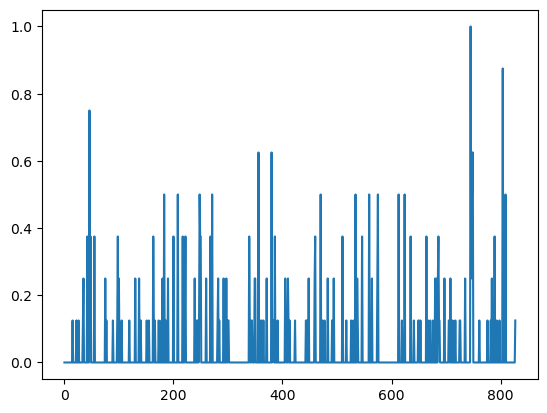

In [12]:
transcript_signals["signal"].plot()

In [13]:
constraints = [
    "x" if transcript_signals["signal"].iloc[i] > THRESHOLD
    else "." for i in range(len(transcript_signals))
]
with open(f"../output/{GENE_NAME}/constrained.fasta", "w") as f:
    f.write(f">{rec.id}\n{rec.seq}\n{''.join(constraints)}\n")